In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_movies=pd.read_csv('ml-latest-small\movies.csv')
df_links=pd.read_csv('ml-latest-small\links.csv')
df_ratings=pd.read_csv('ml-latest-small/ratings.csv')
df_tags=pd.read_csv('ml-latest-small/tags.csv')

In [78]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [79]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [80]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [81]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [82]:
df_ratings.info()
df_ratings.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


(100836, 4)

Note : ratings.csv have no categorical features

In [83]:
df_movies.info()
df_movies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


(9742, 3)

Note : movies.csv have 2 categorical features which we will modify and use in the upcoming implementations

In [84]:
df_tags.info()
df_tags.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


(3683, 4)

Note : tags.csv have one categorical feature. Here we will treat is as text and we will perform tf-idf vectorization on it.

In [85]:
df_links.info()
df_links.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


(9742, 3)

Note : It has not categorical features and also this dataset will be of no use to us

In [86]:
## By reviewing the datasets we can see that the links.csv will not be used for our usecase. 
## links.csv will only be helpful when we need to extract more information about the movie.

## Exploratory Data Analysis
We will perform EDA and try to understand the data.
We will apply EDA in this order:
1. ratings.csv
2. movies.csv
3. tags.csv

##
#### ratings.csv

In [87]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [88]:
df_ratings['movieId'].nunique()

9724

In [89]:
df_ratings['userId'].nunique()

610

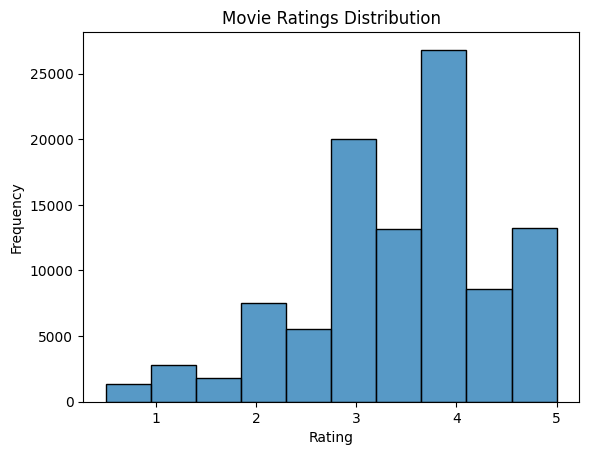

In [90]:
## lets see the ratings distribution 
sns.histplot(df_ratings['rating'],bins=10)
plt.title("Movie Ratings Distribution")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

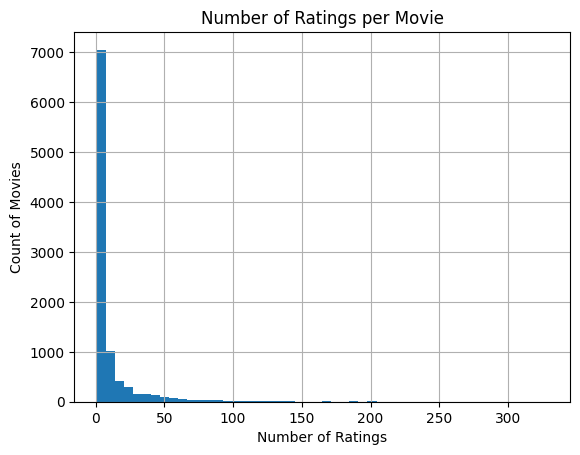

In [99]:
# lets see how many number of ratings does one movie recieve
ratings_per_movie = df_ratings.groupby('movieId').size()
ratings_per_movie.hist(bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies')
plt.show()

Conclusion : Maximum number of movies have the ratings between 3.7 to 4.1 and maximum number of movies have 0-8 number of ratings.

##
#### movies.csv

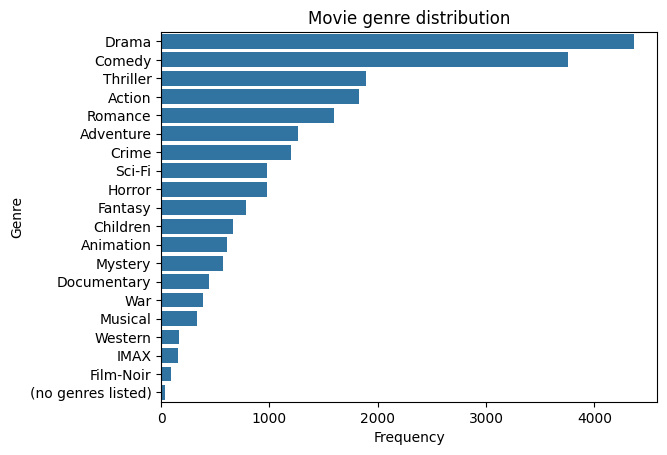

In [98]:
## lets have a look at genres distribution
df_movies['genres']=df_movies['genres'].apply(lambda x: x.split('|'))
total_genres=[genre for sublist in df_movies['genres'] for genre in sublist]
sns.countplot(y=total_genres,order=pd.Series(total_genres).value_counts().index)
plt.title("Movie genre distribution")
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

Conclusion : We can see the frequency of the drama genre is highest then comes comedy. There are very less cells which have no genres listed.

##
#### tags.csv

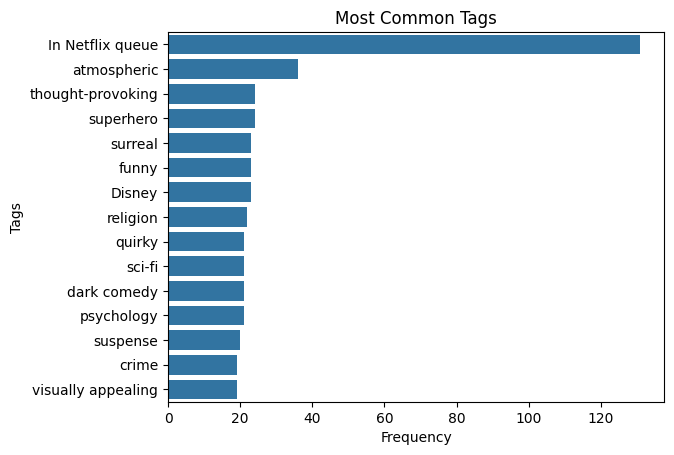

In [106]:
## Lets see the most common tags that have been assigned to the movie
most_common=df_tags['tag'].value_counts().head(15)
sns.barplot(x=most_common.values,y=most_common.index)
plt.title("Most Common Tags")
plt.xlabel("Frequency")
plt.ylabel("Tags")
plt.show()


Conclusion : From this observation we can take away that most of the users are associated with netflix and consume content from it.

In [125]:
print("null values in df_ratings :")
print(df_ratings.isnull().sum())
print("\nnull values in df_movies :")
print(df_movies.isnull().sum())
print("\nnull values in df_tags :")
print(df_tags.isnull().sum())

null values in df_ratings :
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

null values in df_movies :
movieId    0
title      0
genres     0
dtype: int64

null values in df_tags :
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


There are no null values which needs handling.

However, we will be using a lot of data cleaning when we combine these 3 dataframes